# This jupyter notebook is prepared by Matthias Rathbun.

# 1. Load Data and perform basic EDA 
<hr>
<ol type="I">

  <li> import libraries necessary libraries and perform necessariy nltk download operations </li>
  <li> As part of understanding how the columns are separated, read the file using the open function and create a list and show the first 10 items in the list </li>
  <li> Based on your observation on how the data are separated, load the data set into pandas data frame and show the first 5 and last 5 rows </li>
  <li> See whether there are any null values and remove all the rows with any null values, and then show again that there are no more null values </li>
  <li> Generate a counterplot to show the number of news in each subject </li>
  <li> Generate a counterplot to show the number of news in each category (fake/ True) </li>
  <li> Generate two word clouds, one for fake news and one for true news, and observe the most frequent words in each category and just write your observation on them. </li>
  <li> Create a column "AllText" that has the concatenated subject, title, and text [For example, for each news we have the subject, title, and text. We want a column that has all of this together as a large string]  [See the example answer with the majority vote in this <a href="https://stackoverflow.com/questions/39291499/how-to-concatenate-multiple-column-values-into-a-single-column-in-pandas-datafra"> Link</a>] </li>
  <li> Using the dataframe's copy function, save the data frame into another dataframe so that you can use it later
<li> Drop the title, text, subject, and date columns from the data frame as we will not use them separately. We have all the text in a single column that you have generated above </li>
  <li> Calculate the length of each text (I mean AllText column) and put them in a length column </li>
  <li> Plot two histograms to see the distribution of the lengths. One for fake news and one for true news. Write in words about the plots </li>
  <li> Write in Words: What is TFIDF? How to create bag of words using sklearn? And how to generate TFIDF for the bag of words? </li>
</ol>

In [15]:
import pandas as pd
import nltk   
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
import seaborn as sns
from sklearn.model_selection import train_test_split
import string
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from newspaper import Article
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import numpy as np
from hyperas import optim
from hyperas.distributions import choice, uniform
from hyperopt import Trials, STATUS_OK, tpe
import _locale
_locale._getdefaultlocale = (lambda *args: ['en_US', 'utf8'])
%matplotlib inline

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [3]:
nltk.download('wordnet') # we will use wordnet lemmatizer
nltk.download('averaged_perceptron_tagger') #to be used for tagger
nltk.download('punkt') 
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
f = open("news.csv", "r", encoding="utf8")
i = 0
for x in f:
    print(x)
    i+=1
    if i > 9:
        break

title	text	subject	date	target

As U.S. budget fight looms, Republicans flip their fiscal script	WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want

In [5]:
df = pd.read_csv("news.csv", sep = "\t")

In [6]:
df

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [7]:
df.isna().sum().sort_values(ascending = False)

title      0
text       0
subject    0
date       0
target     0
dtype: int64

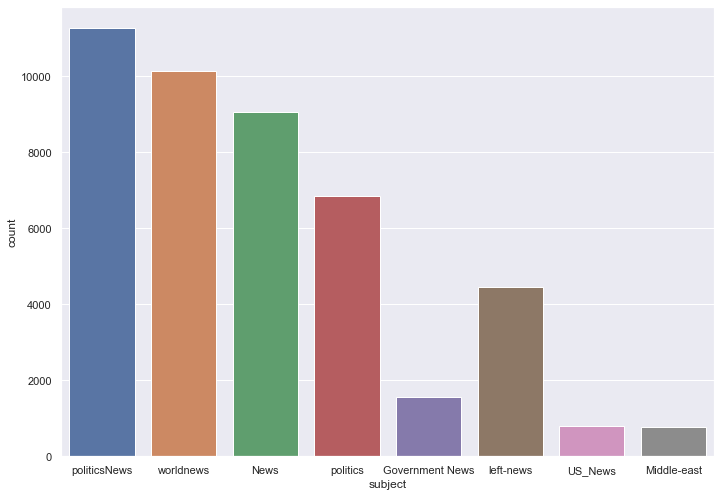

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(x="subject", data=df)

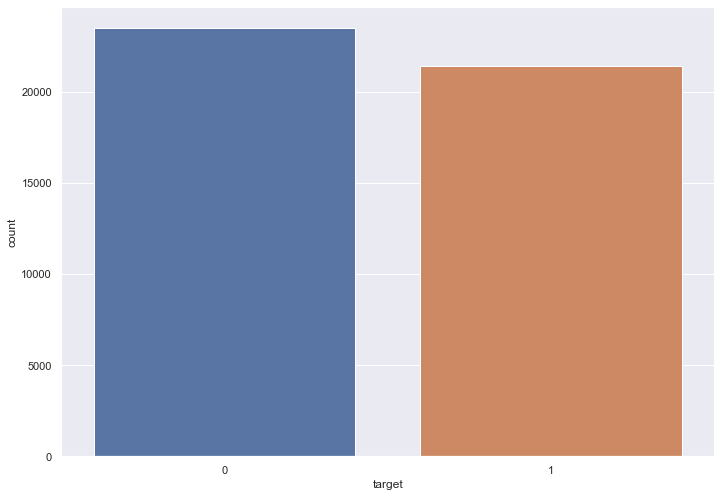

In [9]:
ax = sns.countplot(x="target", data=df)

In [10]:
df_true = df.loc[df['target'] == 1]
df_fake = df.loc[df['target'] == 0]

In [11]:
word_cloud_true = WordCloud(collocations = False, background_color = 'white').generate(" ".join(df_true["text"]))
word_cloud_fake = WordCloud(collocations = False, background_color = 'white').generate(" ".join(df_fake["text"]))


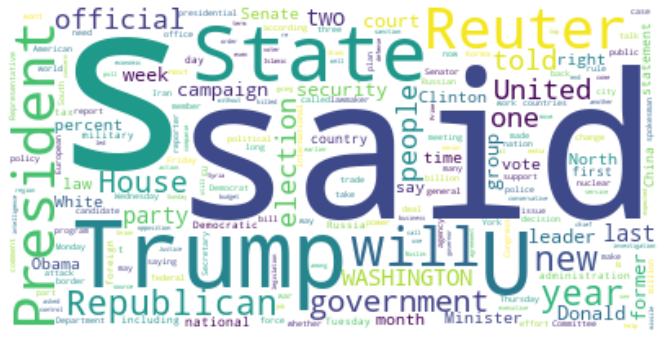

In [12]:
plt.imshow(word_cloud_true, interpolation='bilinear')
plt.axis("off")
plt.show()

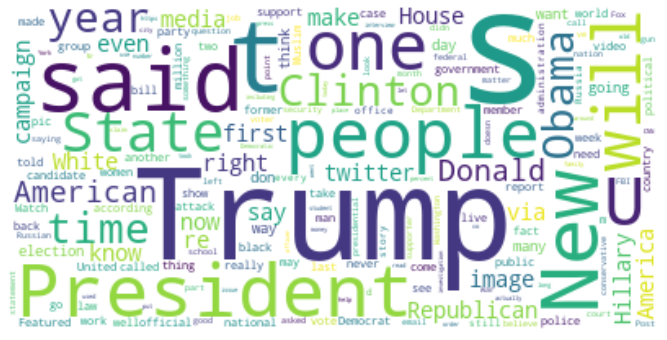

In [13]:
plt.imshow(word_cloud_fake, interpolation='bilinear')
plt.axis("off")
plt.show()

Lots of mentions of Obama and Clinton in the fake news that are not as present in real news. potentially discussing conspiracy theories of misinformation.

In [14]:
df["AllText"] = df['subject'] + " " +  df['title'] + " " + df["text"]

In [15]:
df

,title,text,subject,date,target,AllText
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"politicsNews As U.S. budget fight looms, Repub..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,politicsNews U.S. military to accept transgend...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,politicsNews Senior U.S. Republican senator: '...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,politicsNews FBI Russia probe helped by Austra...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,politicsNews Trump wants Postal Service to cha...
...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0,Middle-east McPain: John McCain Furious That I...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0,Middle-east JUSTICE? Yahoo Settles E-mail Priv...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0,Middle-east Sunnistan: US and Allied ‘Safe Zon...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0,Middle-east How to Blow $700 Million: Al Jazee...


In [16]:
df_copy = df.copy()

In [17]:
df = df.drop(columns = ["title", "text", "subject","date"])

In [18]:
df["length"] = df['AllText'].apply(len)

<AxesSubplot:xlabel='length', ylabel='Count'>

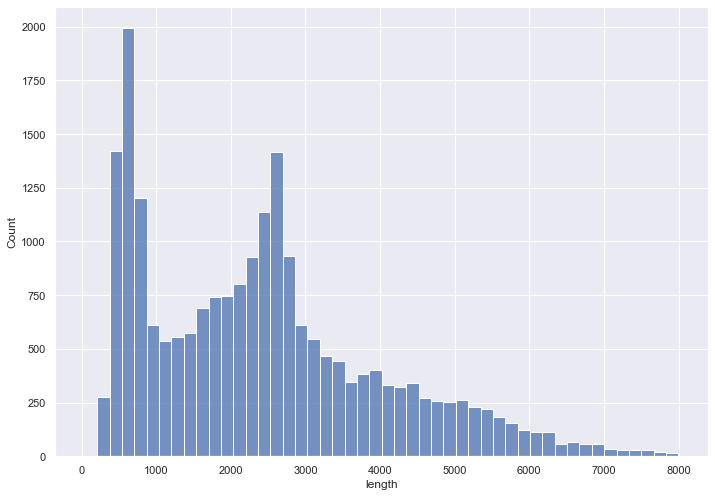

In [19]:
sns.histplot(data=df.loc[(df["target"] == 1) & (df["length"] < 8000)], x="length")

<AxesSubplot:xlabel='length', ylabel='Count'>

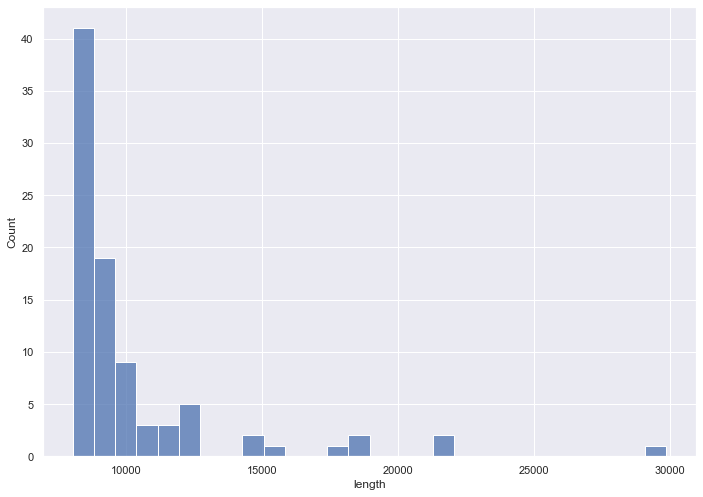

In [20]:
sns.histplot(data=df.loc[(df["target"] == 1) & (df["length"] >= 8000)], x="length")

<AxesSubplot:xlabel='length', ylabel='Count'>

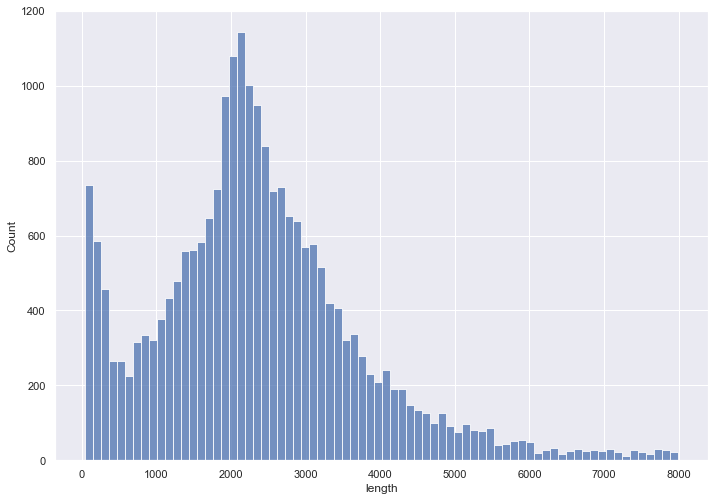

In [21]:
sns.histplot(data=df.loc[(df["target"] == 0) & (df["length"] < 8000)], x="length")

<AxesSubplot:xlabel='length', ylabel='Count'>

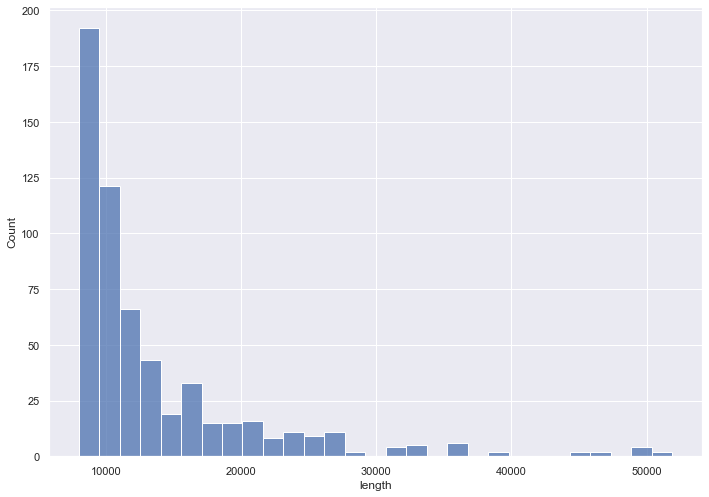

In [22]:
sns.histplot(data=df.loc[(df["target"] == 0) & (df["length"] >= 8000)], x="length")

Fake news seems to have some articles that are very long in length and a lot less that are very short in length. Real news barely has any articles past 8000 words but there are substantial news articles longer than 8000.

TFIDF is a statistic reflecting the importance of a word to a text. It rewards words that are high frequency in few texts while removing weight from words that are common in all texts in order to find words that are most important to the text. Each word from the bag of words can be counted and stored in a count vector which the TFIDF Model can pass over to assign weights.

# 2. Train Test Split
<hr>
<ol type="I">
  <li> Import related libraries and perform train test split. Keep 20% data in the test set </li> 
  <li> Using a count plot show how many real and fake news do we have in the training set and how many in the test set </li> 
</ol>


In [23]:
df

,target,AllText,length
0,1,"politicsNews As U.S. budget fight looms, Repub...",4737
1,1,politicsNews U.S. military to accept transgend...,4155
2,1,politicsNews Senior U.S. Republican senator: '...,2863
3,1,politicsNews FBI Russia probe helped by Austra...,2534
4,1,politicsNews Trump wants Postal Service to cha...,5287
...,...,...,...
44893,0,Middle-east McPain: John McCain Furious That I...,3311
44894,0,Middle-east JUSTICE? Yahoo Settles E-mail Priv...,1778
44895,0,Middle-east Sunnistan: US and Allied ‘Safe Zon...,25163
44896,0,Middle-east How to Blow $700 Million: Al Jazee...,2765


In [24]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [26]:
df_train = pd.DataFrame()
df_train["AllText"] = X_train["AllText"]
df_train["length"] = X_train["length"]
df_train["target"] = y_train

In [27]:
df_test = pd.DataFrame()
df_test["AllText"] = X_test["AllText"]
df_test["length"] = X_test["length"]
df_test["target"] = y_test

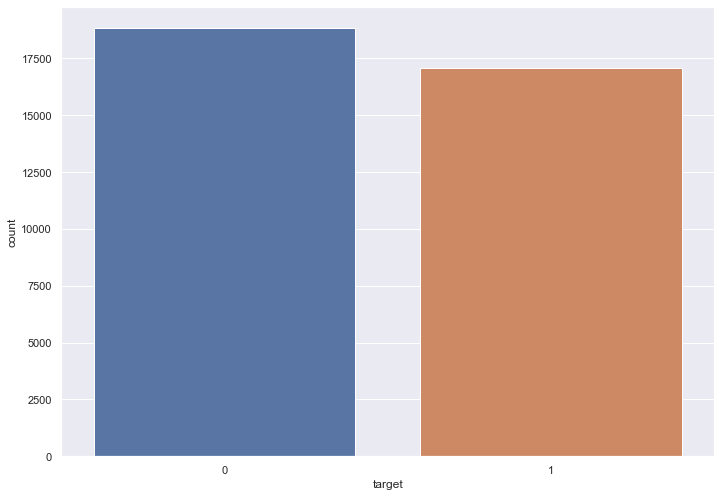

In [28]:
ax = sns.countplot(x="target", data=df_train)

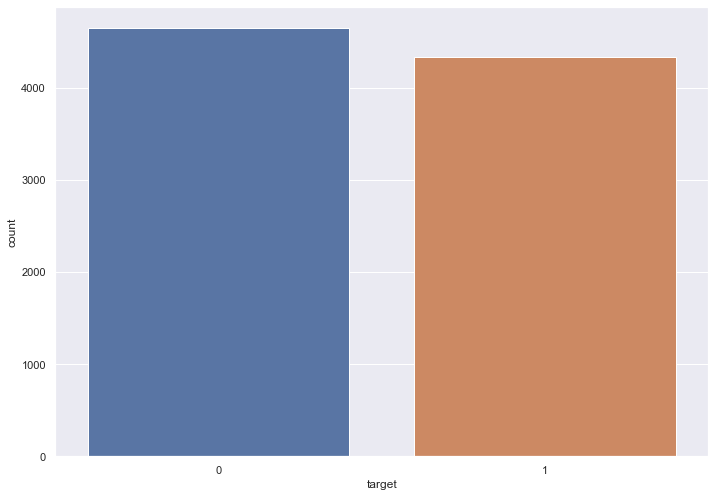

In [29]:
ax = sns.countplot(x="target", data=df_test)

# 3. Training and Testing Fake news classifier using MultinomialNB
<hr>
<ol type="I">
  <li> Create a pipeline that will use countVectorizer with the function you have created earlier for data preprocessing, then use Tftransformer and then use the NaiveBayes classifier </li> 
  <li> Fit the pipeline and then perform prediction </li> 
  <li> Generate classification report and confusion matrix (you have to achieve at least 96% accuracy for the test set to receive full credit) </li> 
  <li> Discuss the performance like how good the model is overall, how good is it in predicting fake news, and how good is it in predicting true news. </li> 
  <li> Copy a part of any news of your choice from a news website and then use the model to predict whether is it true or not. </li> 
</ol>

In [30]:
stemmer = LancasterStemmer()

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Tokenize
    3. convert them to lower case
    4. Remove all stopwords
    3. Perform stemming
    4. Returns a list of the cleaned text
    """

    stopwordList = stopwords.words('english')

    # Check characters to see if they are in punctuation
    mess = [char for char in mess if char not in string.punctuation]
     # Join the characters again to form the string.
    mess = ''.join(mess)

    words = nltk.word_tokenize(mess)
    words = [t for t in words if t not in stopwordList]
    words = [stemmer.stem(w.lower()) for w in words]

    return words

In [31]:
# Check to make sure its working. Just applying the functin to top 5 rows without chaning my data frame
df['AllText'].head(5).apply(text_process)

0    [politicsnew, as, us, budget, fight, loom, rep...
1    [politicsnew, us, milit, acceiv, transgend, re...
2    [politicsnew, seny, us, republ, sen, let, mr, ...
3    [politicsnew, fbi, russ, prob, help, aust, dip...
4    [politicsnew, trump, want, post, serv, charg, ...
Name: AllText, dtype: object

In [32]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['AllText']) #see we are passing our function name in the analyzer

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

185013


In [33]:
text_bow = bow_transformer.transform(df['AllText'])
text_bow

<44898x185013 sparse matrix of type '<class 'numpy.int64'>'
	with 7388188 stored elements in Compressed Sparse Row format>

In [34]:
tfidf_transformer = TfidfTransformer().fit(text_bow)
text_tfidf = tfidf_transformer.transform(text_bow)
print(text_tfidf.shape)

(44898, 185013)


In [35]:
text_tfidf

<44898x185013 sparse matrix of type '<class 'numpy.float64'>'
	with 7388188 stored elements in Compressed Sparse Row format>

In [36]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [37]:
pipeline.fit(df_train["AllText"],df_train["target"])

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000017D08044310>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [38]:
predictions = pipeline.predict(df_test["AllText"])

In [39]:
print(confusion_matrix(predictions, df_test["target"]))
print(classification_report(predictions,df_test["target"]))

[[4453  195]
 [ 192 4140]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4648
           1       0.96      0.96      0.96      4332

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



Model classifies 96% of articles correctly. There are 195 instances of fake news being classified as real news and 192 instances of real news being classified as fake news.

### Fake News

In [40]:
url = "https://babylonbee.com/news/local-carpenter-continues-to-spread-disinformation-and-teachings-deemed-harmful-by-religious-experts"
article = Article(url)

In [41]:
article.download()
article.parse()

In [42]:
text = "Middle-east " + article.title + " " + article.text

In [43]:
pipeline.predict([text])

array([0], dtype=int64)

### Missclassified Real News

In [44]:
url = "https://www.foxnews.com/politics/tulsi-gabbard-obama-ministry-truth"
article = Article(url)

In [45]:
article.download()
article.parse()

In [46]:
text = "US_News " + article.title + " " + article.text

In [47]:
pipeline.predict([text])

array([0], dtype=int64)

### Real News

In [48]:
url = "https://www.cnn.com/2022/05/01/europe/russia-farm-vehicles-ukraine-disabled-melitopol-intl/index.html"
article = Article(url)

In [49]:
article.download()
article.parse()

In [50]:
text = "worldnews " + article.title + " " + article.text

In [51]:
pipeline.predict([text])

array([1], dtype=int64)

# 4. Training and Testing a Deep Neural Network
<hr>
<ol type="I">
  <li> Import related library for using MLPClassifier from sklearn neural netowrk. </li> 
  <li> Create a pipeline like 3i, for MLPClassfier you should use at least two layers and also should verbose = 2 (you can use other parameters as you wish or use the one you see from the uploaded google colab) </li> 
  <li> Fit the pipeline and then perform prediction </li> 
  <li> Generate classification report and confusion matrix (You have to achieve at least 99% accuracy to receive full credit for this model) </li> 
  <li> Discuss the performance like how good the model is overall, how good is it in predicting fake news, and how good is it in predicting true news. </li> 
  <li> Use the same news you have used above and then use the model to predict whether is it true or not. </li> 
  <li> Discuss any difference in performance between this model and NB model </li> 
</ol>



In [52]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,4), random_state=0, early_stopping=True, verbose=2)),  # train on TF-IDF vectors w/ MLPClassifier classifier with two hidden layers
])

In [53]:
pipeline.fit(df_train["AllText"],df_train["target"])

Iteration 1, loss = 0.32756278
Validation score: 0.988864
Iteration 2, loss = 0.18242194
Validation score: 0.991370
Iteration 3, loss = 0.15289204
Validation score: 0.991091
Iteration 4, loss = 0.13295309
Validation score: 0.988864
Iteration 5, loss = 0.11702874
Validation score: 0.988029
Iteration 6, loss = 0.10382493
Validation score: 0.989978
Iteration 7, loss = 0.09263313
Validation score: 0.989143
Iteration 8, loss = 0.08301853
Validation score: 0.990256
Iteration 9, loss = 0.07469006
Validation score: 0.990535
Iteration 10, loss = 0.06743518
Validation score: 0.991370
Iteration 11, loss = 0.06107118
Validation score: 0.990535
Iteration 12, loss = 0.05547103
Validation score: 0.990535
Iteration 13, loss = 0.05050487
Validation score: 0.991370
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000017D08044310>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 4),
                               random_state=0, verbose=2))])

In [54]:
predictions = pipeline.predict(df_test["AllText"])

In [55]:
print(confusion_matrix(predictions, df_test["target"]))
print(classification_report(predictions,df_test["target"]))

[[4626   55]
 [  19 4280]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4681
           1       0.99      1.00      0.99      4299

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Model is 99% accurate. 55 Instances of fake news are classifed as real news and 19 instances of real news are classified as fake news

### Fake News

In [56]:
url = "https://babylonbee.com/news/local-carpenter-continues-to-spread-disinformation-and-teachings-deemed-harmful-by-religious-experts"
article = Article(url)

In [57]:
article.download()
article.parse()

In [58]:
text = "Middle-east " + article.title + " " + article.text

In [59]:
pipeline.predict([text])

array([0], dtype=int64)

### Misclassified Real News

In [60]:
url = "https://www.foxnews.com/politics/tulsi-gabbard-obama-ministry-truth"
article = Article(url)

In [61]:
article.download()
article.parse()

In [62]:
text = "US_News " + article.title + " " + article.text

In [63]:
pipeline.predict([text])

array([0], dtype=int64)

### Misclassified Real News

In [64]:
url = "https://www.cnn.com/2022/05/01/europe/russia-farm-vehicles-ukraine-disabled-melitopol-intl/index.html"
article = Article(url)

In [65]:
article.download()
article.parse()

In [66]:
text = "worldnews " + article.title + " " + article.text

In [67]:
pipeline.predict([text])

array([0], dtype=int64)

Overall the Deep Learning model is more accurate based on the classification report. This is due to it being a more complex model and thus being able to learn more about the intricacies of the data. It is interesting though on using articles from today, that both the models missclassified real news. This could be due to the topics covered in todays news being different and the model is not reflecting those changes, thus the classifier shows them as fake news. This issue could just be fixed with a newer dataset. 

# 5. Extra Credit
<hr>

Build a high-performance model for classifying the news into different subjects. It means your target column will be the subject column. During this process, you have to use a neural network, properly preprocess the data frame, remove irrelevant columns, train and test the model properly and then finally show the classification report and confusion matrix. In order to get full credit, it should be at least 79% accurate in predicting the subject of news. Finally, you should discuss the classification report like what are the weaknesses of the model and what are the strengths of the model. 

In [ ]:
def data():
    
    stemmer = LancasterStemmer()

    def text_process(mess):


        stopwordList = stopwords.words('english')

        mess = [char for char in mess if char not in string.punctuation]
        mess = ''.join(mess)

        words = nltk.word_tokenize(mess)
        words = [t for t in words if t not in stopwordList]
        words = [stemmer.stem(w.lower()) for w in words]

        return words
    
    def convert_sparse_matrix_to_sparse_tensor(X):
        coo = X.tocoo()
        indices = np.mat([coo.row, coo.col]).transpose()
        return tf.SparseTensor(indices, coo.data, coo.shape)
    
    df = pd.read_csv("news.csv", sep = "\t")
    df["target"] = df["subject"]
    df["TitleText"] = df["title"] + " " + df["text"]
    df = df.drop(columns = ["title", "text", "subject", "date"])
    df.target = df["target"].astype("category").cat.codes
    subject = tf.keras.utils.to_categorical(df["target"].values, num_classes=8)
    text_train, text_test, y_train, y_test = train_test_split(df["TitleText"], subject, test_size=0.2, random_state=101)
    bow_transformer = CountVectorizer(analyzer=text_process).fit(df["TitleText"])
    text_bow = bow_transformer.transform(df["TitleText"])
    tfidf_transformer = TfidfTransformer().fit(text_bow)
    train_bow = bow_transformer.transform(text_train)
    train_tfidf = tfidf_transformer.transform(train_bow)
    test_bow = bow_transformer.transform(text_test)
    test_tfidf = tfidf_transformer.transform(test_bow)
    train_tensor = convert_sparse_matrix_to_sparse_tensor(train_tfidf)
    x_train = tf.sparse.reorder(train_tensor)
    test_tensor = convert_sparse_matrix_to_sparse_tensor(test_tfidf)
    x_test = tf.sparse.reorder(test_tensor)
    return x_train, y_train, x_test, y_test

In [13]:
x_train, y_train, x_test, y_test = data()

In [176]:
model = tf.keras.Sequential()
model.add(layers.Dense(12, input_dim = x_train.shape[1], activation = "tanh")) # input layer requires input_dim param
model.add(layers.Dense(12, activation = "tanh"))
model.add(layers.Dense(12, activation = "tanh"))
model.add(layers.Dense(12, activation = "tanh"))
model.add(layers.Dense(8, activation='softmax'))
model.summary()
model.compile(loss="binary_crossentropy", optimizer= "rmsprop", metrics=['accuracy'])
es = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.005, patience=1, verbose=1, mode='auto')
with tf.device('/cpu:0'):
    model.fit(x_train, y_train, epochs = 100, shuffle = True, batch_size=128, verbose=1, callbacks=[es])
    score = model.evaluate(x_test, y_test, verbose=0)

Model: "sequential_91"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_461 (Dense)           (None, 12)                2220120   
                                                                 
 dense_462 (Dense)           (None, 12)                156       
                                                                 
 dense_463 (Dense)           (None, 12)                156       
                                                                 
 dense_464 (Dense)           (None, 12)                156       
                                                                 
 dense_465 (Dense)           (None, 8)                 104       
                                                                 
Total params: 2,220,692
Trainable params: 2,220,692
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


C:\Users\matth\anaconda3\envs\ML\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_91/dense_461/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_91/dense_461/embedding_lookup_sparse/Reshape:0", shape=(None, 12), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_91/dense_461/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


281/281 [==============================] - 2s 6ms/step - loss: 0.3670 - accuracy: 0.3105
Epoch 2/100
281/281 [==============================] - 2s 6ms/step - loss: 0.2288 - accuracy: 0.7060
Epoch 3/100
281/281 [==============================] - 2s 6ms/step - loss: 0.1414 - accuracy: 0.8087
Epoch 4/100
281/281 [==============================] - 2s 7ms/step - loss: 0.0996 - accuracy: 0.8276
Epoch 5/100
281/281 [==============================] - 2s 7ms/step - loss: 0.0826 - accuracy: 0.8408
Epoch 6/100
281/281 [==============================] - 2s 6ms/step - loss: 0.0749 - accuracy: 0.8444
Epoch 7/100
281/281 [==============================] - 2s 7ms/step - loss: 0.0703 - accuracy: 0.8453
Epoch 7: early stopping


In [177]:
predictions = model.predict(x_test)

In [178]:
y_predictions=np.argmax(predictions, axis=1)
tests=np.argmax(y_test, axis=1)

In [179]:
print(confusion_matrix(y_predictions, tests))
print(classification_report(y_predictions,tests))

[[   1    1    1    1    0    2    0    0]
 [   0    2    0    4    0    0    0    0]
 [   1    2 1744    2   11   30    3    0]
 [   3  162    1  146    0    0    0    0]
 [   0    0    0    0    1    6    0    0]
 [ 280    0   53    0  887 1280    4    9]
 [   1    0    2    0    0    5 2285   27]
 [   4    1    3    1    3    4   40 1967]]
              precision    recall  f1-score   support

           0       0.00      0.17      0.01         6
           1       0.01      0.33      0.02         6
           2       0.97      0.97      0.97      1793
           3       0.95      0.47      0.63       312
           4       0.00      0.14      0.00         7
           5       0.96      0.51      0.67      2513
           6       0.98      0.98      0.98      2320
           7       0.98      0.97      0.98      2023

    accuracy                           0.83      8980
   macro avg       0.61      0.57      0.53      8980
weighted avg       0.97      0.83      0.88      8980



Model is 83% accurate in predicting the subject of news. It has weaknesses where support is low. Which is for subjects where there are not many articles for. This simply shows that given more data on articles that have less represented subjects, the model can be improved significantly.